In [1]:
import pandas as pd

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

## Predict the onset of diabetes based on diagnostic measures.  
### Target Feature: Outcome (0: no diabetes, 1: has diabetes)

---
# Exploratory Data Analysis

Assign the data to a dataframe

In [2]:
# https://www.kaggle.com/uciml/pima-indians-diabetes-database/downloads/diabetes.csv
df = pd.read_csv('http://bit.ly/pima_diabetes_csv')

Inspect the first set of rows

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Inspect the last set of rows

In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Sample the dataframe

In [5]:
df.sample(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
301,2,144,58,33,135,31.6,0.422,25,1
17,7,107,74,0,0,29.6,0.254,31,1
519,6,129,90,7,326,19.6,0.582,60,0
219,5,112,66,0,0,37.8,0.261,41,1
123,5,132,80,0,0,26.8,0.186,69,0
151,4,114,65,0,0,21.9,0.432,37,0
478,8,126,74,38,75,25.9,0.162,39,0
450,1,82,64,13,95,21.2,0.415,23,0
381,0,105,68,22,0,20.0,0.236,22,0
730,3,130,78,23,79,28.4,0.323,34,1


Generate descriptive statistics

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Visualize distribution and relationships between two variables

In [7]:
df_strong_features = df[['Glucose','BMI','Age','Pregnancies','Outcome']]

In [8]:
df_strong_features.head()

,Glucose,BMI,Age,Pregnancies,Outcome
0,148,33.6,50,6,1
1,85,26.6,31,1,0
2,183,23.3,32,8,1
3,89,28.1,21,1,0
4,137,43.1,33,0,1


/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


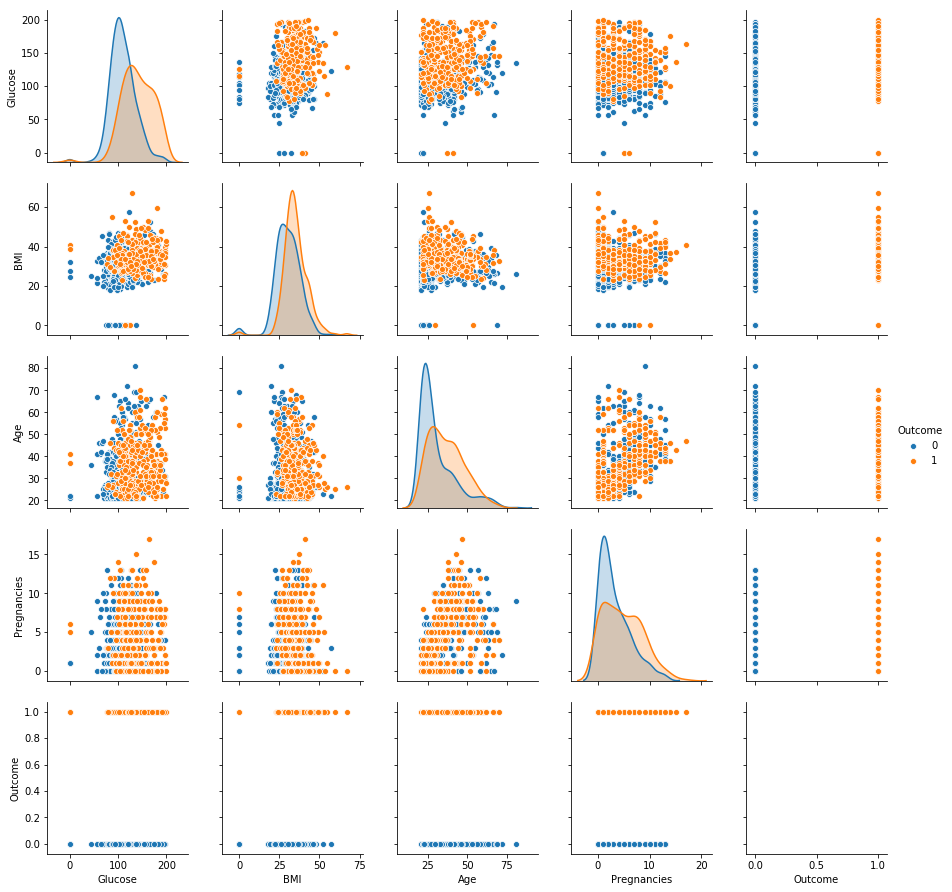

In [9]:
sns.pairplot(df_strong_features, hue='Outcome')

Calculate and visualize correlation 

In [10]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


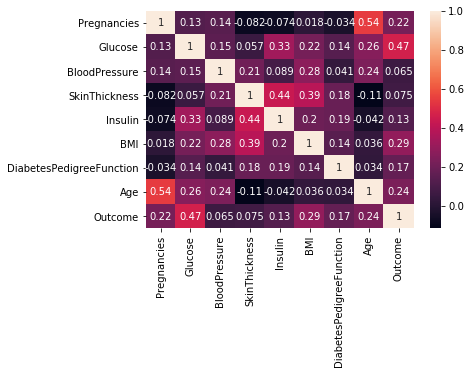

In [11]:
sns.heatmap(df.corr(),
            xticklabels=df.corr().columns,
            yticklabels=df.corr().columns,
           annot=True
           )

---
# Modeling

Assign features (X) and target (y)

In [12]:
X = df[['Glucose','BMI','Age','Pregnancies']]
y = df['Outcome']

Split data into train and test datasets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Select an algorithm

Train model (fit)

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Predict the target variable on the test set

In [15]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

---
# Model Evaluation

## Confusion Matrix  
Describes a classification model's performance


In [16]:
print(confusion_matrix(y_test, predictions))

[[85 14]
 [22 33]]


In [17]:
pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,85,14,99
1,22,33,55
All,107,47,154


- There are two possible class predictions: 0 (does not have diabetes) and 1 (has diabetes)
- 154 total predictions
- Predicted 1 47x, 0 107
- Actual shows 55 have diabetes and 99 do not

In [18]:
true_negatives, false_positives, false_negatives, true_positives = confusion_matrix(y_test, predictions).ravel()
true_negatives, false_positives, false_negatives, true_positives

(85, 14, 22, 33)


True positives: data points labeled as positive that are actually positive

---


False positives: data points labeled as positive that are actually negative

---


True negatives: data points labeled as negative that are actually negative

---


False negatives: data points labeled as negative that are actually positive

In [19]:
total = true_negatives + false_positives + false_negatives + true_positives
total

154

![](https://cdn-images-1.medium.com/max/800/1*OhEnS-T54Cz0YSTl_c3Dwg.jpeg)

# Accuracy  
How often is the classifier correct?  
(True Positives + True Negatives) / Total

In [20]:
accuracy = metrics.accuracy_score(y_test, predictions)
accuracy

0.7662337662337663

# Error Rate
How often is the classifier wrong?  
(False Positives + False Negatives) / Total

In [21]:
error_rate = (false_negatives + false_negatives) / total
error_rate

0.2857142857142857

# Coefficients

In [22]:
pd.DataFrame(model.coef_, index = ['Coef'], columns = X.columns).T

,Coef
Glucose,0.023531
BMI,0.052309
Age,0.018236
Pregnancies,0.063522


# Classification Report

In [23]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        99
           1       0.70      0.60      0.65        55

   micro avg       0.77      0.77      0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



precision: 
 - Ability of a classification model to return only relevant instances
 - When it predicts 1, how often is it correct?
 - True Positives / (True Positives + False Positives)


recall aka sensitivity: 
- Ability of a classification model to identify all relevant instances  
- When it's actually 1, how often does it predict 1?
- True Positives / (True Positives + False Negatives)


f1-score: 
- Balance between precision and recall  
- 2 * (Precision * Recall / Precision + Recall)


Probability prediction for each outcome class. In a binary classification, a pair of probabilities is returned. Here, the first probability is for 0 and the second is for 1.


In [24]:
model.predict_proba(X_train)

array([[0.97293794, 0.02706206],
       [0.61649507, 0.38350493],
       [0.69678108, 0.30321892],
       ...,
       [0.49466669, 0.50533331],
       [0.5010462 , 0.4989538 ],
       [0.82742981, 0.17257019]])

Make a prediction on a single, new patient.

In [25]:
X_train.head()

,Glucose,BMI,Age,Pregnancies
60,84,0.0,21,2
618,112,28.2,50,9
346,139,28.7,22,1
294,161,21.9,65,0
231,134,46.2,46,6


For testing, input arbitrary values for the input features.

In [26]:
X_new = pd.DataFrame([[112,28.2,50.0,9.0]], columns=['Glucose','BMI','Age','Pregnancies'])
#X_new = pd.DataFrame([[134,46.2,46.0,6.0]], columns=['Glucose','BMI','Age','Pregnancies'])
model.predict_proba(X_new)

array([[0.61649507, 0.38350493]])

Make a prediction on the single observation

In [27]:
model.predict(X_new)

array([0])